In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Data-Collisions.csv')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape
df.dropna()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR


In [4]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [5]:
df_mod = df[['SEVERITYCODE','SEVERITYDESC', 'ADDRTYPE', 'INCDATE','INCDTTM', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND','SPEEDING', 'HITPARKEDCAR']]

df_map = df[['SEVERITYCODE','ADDRTYPE','X', 'Y']]

In [6]:
df_mod.shape

(194673, 13)

In [7]:
df_mod.info

<bound method DataFrame.info of         SEVERITYCODE                    SEVERITYDESC      ADDRTYPE  \
0                  2                Injury Collision  Intersection   
1                  1  Property Damage Only Collision         Block   
2                  1  Property Damage Only Collision         Block   
3                  1  Property Damage Only Collision         Block   
4                  2                Injury Collision  Intersection   
...              ...                             ...           ...   
194668             2                Injury Collision         Block   
194669             1  Property Damage Only Collision         Block   
194670             2                Injury Collision  Intersection   
194671             2                Injury Collision  Intersection   
194672             1  Property Damage Only Collision         Block   

                       INCDATE                 INCDTTM  \
0       2013/03/27 00:00:00+00    3/27/2013 2:54:00 PM   
1       200

In [8]:
df_mod.replace("?", np.nan, inplace = True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4385: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [9]:
df_mod.isnull().head(6)

,SEVERITYCODE,SEVERITYDESC,ADDRTYPE,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,False,False,False,False,False,False,True,False,False,False,False,True,False
1,False,False,False,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,False,False,True,False,False,False,False,True,False
3,False,False,False,False,False,False,True,False,False,False,False,True,False
4,False,False,False,False,False,False,True,False,False,False,False,True,False
5,False,False,False,False,False,False,True,False,False,False,False,True,False


In [10]:
missing_data = df_mod.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64
SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64
ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64
INCDATE
False    194673
Name: INCDATE, dtype: int64
INCDTTM
False    194673
Name: INCDTTM, dtype: int64
JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64
INATTENTIONIND
True     164868
False     29805
Name: INATTENTIONIND, dtype: int64
UNDERINFL
False    189789
True       4884
Name: UNDERINFL, dtype: int64
WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64
ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64
LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64
SPEEDING
True     185340
False      9333
Name: SPEEDING, dtype: int64
HITPARKEDCAR
False    194673
Name: HITPARKEDCAR, dtype: int64


In [11]:
df_mod["ADDRTYPE"].replace(np.nan, df_mod['ADDRTYPE'].value_counts().idxmax(), inplace=True)
df_mod['ADDRTYPE'].value_counts()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Block           128852
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [12]:
df_mod["JUNCTIONTYPE"].replace(np.nan, df_mod['JUNCTIONTYPE'].value_counts().idxmax(), inplace=True)
df_mod["JUNCTIONTYPE"].replace("Unknown", df_mod['JUNCTIONTYPE'].value_counts().idxmax(), inplace=True)
df_mod["JUNCTIONTYPE"].replace("Ramp Junction", 'RampDriveway', inplace=True)
df_mod["JUNCTIONTYPE"].replace("Driveway Junction", 'RampDriveway', inplace=True)
df_mod["JUNCTIONTYPE"].replace("At Intersection (intersection related)", 'At-Intersection', inplace=True)
df_mod["JUNCTIONTYPE"].replace("At Intersection (but not related to intersection)", 'At-Intersection', inplace=True)
df_mod['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)    96138
At-Intersection                            64908
Mid-Block (but intersection related)       22790
RampDriveway                               10837
Name: JUNCTIONTYPE, dtype: int64

In [13]:
df_mod["UNDERINFL"].replace(np.nan, df['UNDERINFL'].value_counts().idxmax(), inplace=True)
df_mod['UNDERINFL'] = df['UNDERINFL'].map({'N': 0, '0': 0, 'Y': 1, '1': 1})
df_mod['UNDERINFL'].value_counts()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.0    180668
1.0      9121
Name: UNDERINFL, dtype: int64

In [14]:
df_mod["WEATHER"].replace(np.nan, df_mod['WEATHER'].value_counts().idxmax(), inplace=True)
df_mod["WEATHER"].replace("Other","Unknown",inplace=True)
df_mod["WEATHER"].replace("Partly Cloudy","Overcast",inplace=True)
df_mod["WEATHER"].replace("Raining","RainSnow",inplace=True)
df_mod["WEATHER"].replace("Snowing","RainSnow",inplace=True)
df_mod["WEATHER"].replace("Sleet/Hail/Freezing Rain","RainSnow",inplace=True)
df_mod["WEATHER"].replace("Fog/Smog/Smoke","RainSnow",inplace=True)
df_mod["WEATHER"].replace("Blowing Sand/Dirt","RainSnow",inplace=True)
df_mod["WEATHER"].replace("Severe Crosswind","RainSnow",inplace=True)
df_mod['WEATHER'].value_counts()

Clear       116216
RainSnow     34815
Overcast     27719
Unknown      15923
Name: WEATHER, dtype: int64

In [15]:
df_mod["ROADCOND"].replace(np.nan, df_mod['ROADCOND'].value_counts().idxmax(), inplace=True)
df_mod["ROADCOND"].replace("Ice", "IceOilWaterSnow", inplace=True)
df_mod["ROADCOND"].replace("Standing Water", "IceOilWaterSnow", inplace=True)
df_mod["ROADCOND"].replace("Oil", "IceOilWaterSnow", inplace=True)
df_mod["ROADCOND"].replace("Snow/Slush", "IceOilWaterSnow", inplace=True)
df_mod["ROADCOND"].replace("Other", "Unknown", inplace=True)
df_mod["ROADCOND"].replace("Sand/Mud/Dirt", "IceOilWaterSnow", inplace=True)
df_mod['ROADCOND'].value_counts()

Dry                129522
Wet                 47474
Unknown             15210
IceOilWaterSnow      2467
Name: ROADCOND, dtype: int64

In [16]:
df_mod["LIGHTCOND"].replace(np.nan, df_mod['LIGHTCOND'].value_counts().idxmax(), inplace=True)
df_mod["LIGHTCOND"].replace("Dark - No Street Lights", "Dark-No-Light", inplace=True)
df_mod["LIGHTCOND"].replace("Dark - Street Lights Off", "Dark-No-Light", inplace=True)
df_mod["LIGHTCOND"].replace("Dark - Unknown Lighting", "Dark-No-Light", inplace=True)
df_mod["LIGHTCOND"].replace("Dark - Street Lights On", "Dark-With-Light", inplace=True)
df_mod["LIGHTCOND"].replace("Other", "Unknown", inplace=True)
df_mod["LIGHTCOND"].replace("Dusk", "DuskDawn", inplace=True)
df_mod["LIGHTCOND"].replace("Dawn", "DuskDawn", inplace=True)
df_mod['LIGHTCOND'].value_counts()

Daylight           121307
Dark-With-Light     48507
Unknown             13708
DuskDawn             8404
Dark-No-Light        2747
Name: LIGHTCOND, dtype: int64

In [17]:
df_mod["INATTENTIONIND"].replace(np.nan, "N", inplace=True)
df_mod["INATTENTIONIND"].describe()

count     194673
unique         2
top            N
freq      164868
Name: INATTENTIONIND, dtype: object

In [18]:
df_mod["SPEEDING"].replace(np.nan, "N", inplace=True)
df_mod["SPEEDING"].describe()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


count     194673
unique         2
top            N
freq      185340
Name: SPEEDING, dtype: object

In [19]:
df_mod["SEVERITYDESC"].describe()

count                             194673
unique                                 2
top       Property Damage Only Collision
freq                              136485
Name: SEVERITYDESC, dtype: object

In [20]:
df_mod.info

<bound method DataFrame.info of         SEVERITYCODE                    SEVERITYDESC      ADDRTYPE  \
0                  2                Injury Collision  Intersection   
1                  1  Property Damage Only Collision         Block   
2                  1  Property Damage Only Collision         Block   
3                  1  Property Damage Only Collision         Block   
4                  2                Injury Collision  Intersection   
...              ...                             ...           ...   
194668             2                Injury Collision         Block   
194669             1  Property Damage Only Collision         Block   
194670             2                Injury Collision  Intersection   
194671             2                Injury Collision  Intersection   
194672             1  Property Damage Only Collision         Block   

                       INCDATE                 INCDTTM  \
0       2013/03/27 00:00:00+00    3/27/2013 2:54:00 PM   
1       200

In [21]:
df_map.dropna(subset=["X"], axis=0, inplace=True)
df_map.shape

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(189339, 4)

In [22]:
df_mod.dtypes

SEVERITYCODE        int64
SEVERITYDESC       object
ADDRTYPE           object
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
INATTENTIONIND     object
UNDERINFL         float64
WEATHER            object
ROADCOND           object
LIGHTCOND          object
SPEEDING           object
HITPARKEDCAR       object
dtype: object

In [23]:
df_mod['INCDTTM'] = pd.to_datetime(df_mod['INCDTTM'])
df_mod['INCDATE'] = pd.to_datetime(df_mod['INCDATE'])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
df_mod['hourofday'] = df_mod['INCDTTM'].dt.hour
df_mod['dayofweek'] = df_mod['INCDTTM'].dt.dayofweek
df_mod.head(5)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SEVERITYCODE,SEVERITYDESC,ADDRTYPE,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR,hourofday,dayofweek
0,2,Injury Collision,Intersection,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,At-Intersection,N,0.0,Overcast,Wet,Daylight,N,N,14,2
1,1,Property Damage Only Collision,Block,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,Mid-Block (not related to intersection),N,0.0,RainSnow,Wet,Dark-With-Light,N,N,18,2
2,1,Property Damage Only Collision,Block,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,Mid-Block (not related to intersection),N,0.0,Overcast,Dry,Daylight,N,N,10,3
3,1,Property Damage Only Collision,Block,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,Mid-Block (not related to intersection),N,0.0,Clear,Dry,Daylight,N,N,9,4
4,2,Injury Collision,Intersection,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,At-Intersection,N,0.0,RainSnow,Wet,Daylight,N,N,8,2


<AxesSubplot:xlabel='X', ylabel='count'>

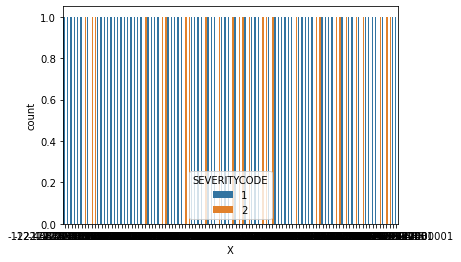

In [25]:
sns.countplot(x ="X", data= df_map.head(100), hue="SEVERITYCODE")

In [26]:
bins = np.linspace(min(df_map["X"]), max(df_map["X"]), 4)
group_names = ['Low', 'Medium', 'High']
df_map['X-binned'] = pd.cut(df_map['X'], bins, labels=group_names, include_lowest=True )
df_map[['X','X-binned']].head(10)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,X,X-binned
0,-122.323148,Medium
1,-122.347294,Medium
2,-122.334540,Medium
3,-122.334803,Medium
4,-122.306426,Medium
5,-122.387598,Low
6,-122.338485,Medium
7,-122.320780,Medium
8,-122.335930,Medium
9,-122.384700,Low


<AxesSubplot:xlabel='X-binned', ylabel='count'>

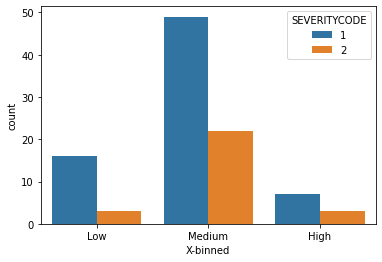

In [27]:
sns.countplot(x ="X-binned", data= df_map.head(100), hue="SEVERITYCODE")

In [28]:
dummy_variable_1 = pd.get_dummies(df_map["ADDRTYPE"])
dummy_variable_1.rename(columns={'Block':'AddType-Block', 'Intersection':'AddType-Intersection'}, inplace=True)
dummy_variable_1.head()

,AddType-Block,AddType-Intersection
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [29]:
df_map = pd.concat([df_map, dummy_variable_1], axis=1)
df_map.head(5)

,SEVERITYCODE,ADDRTYPE,X,Y,X-binned,AddType-Block,AddType-Intersection
0,2,Intersection,-122.323148,47.703140,Medium,0,1
1,1,Block,-122.347294,47.647172,Medium,1,0
2,1,Block,-122.334540,47.607871,Medium,1,0
3,1,Block,-122.334803,47.604803,Medium,1,0
4,2,Intersection,-122.306426,47.545739,Medium,0,1


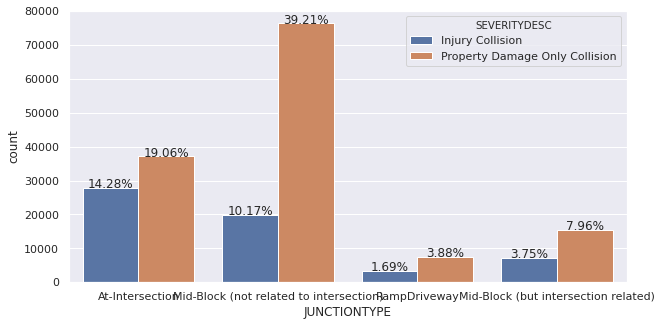

In [30]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
total = float(len(df_mod))
ax = sns.countplot(x="JUNCTIONTYPE", hue="SEVERITYDESC", data=df_mod)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 5,
            '{:.2%}'.format(height/total),
            ha="center") 
show()

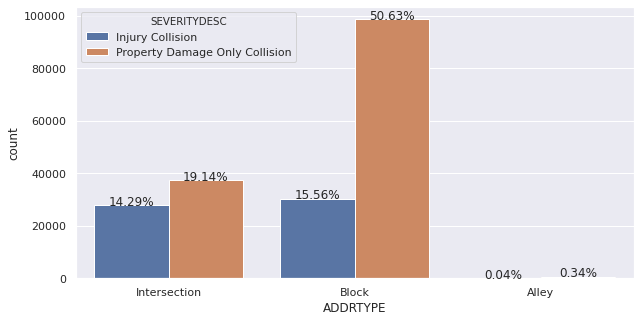

In [31]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
total = float(len(df_mod))
ax = sns.countplot(x="ADDRTYPE", hue="SEVERITYDESC", data=df_mod)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.2%}'.format(height/total),
            ha="center") 
show()

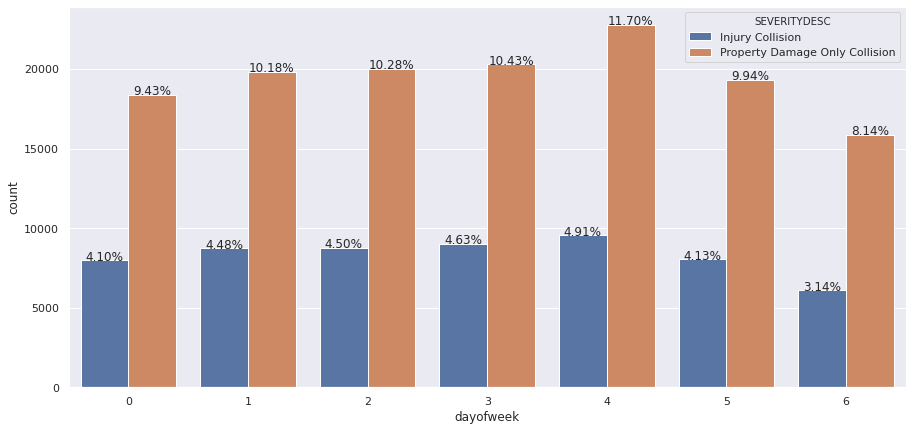

In [32]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(15,7))
sns.set(style="darkgrid")
total = float(len(df_mod))
ax = sns.countplot(x="dayofweek", hue="SEVERITYDESC", data=df_mod) 
# Monday=0, Sunday=6
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


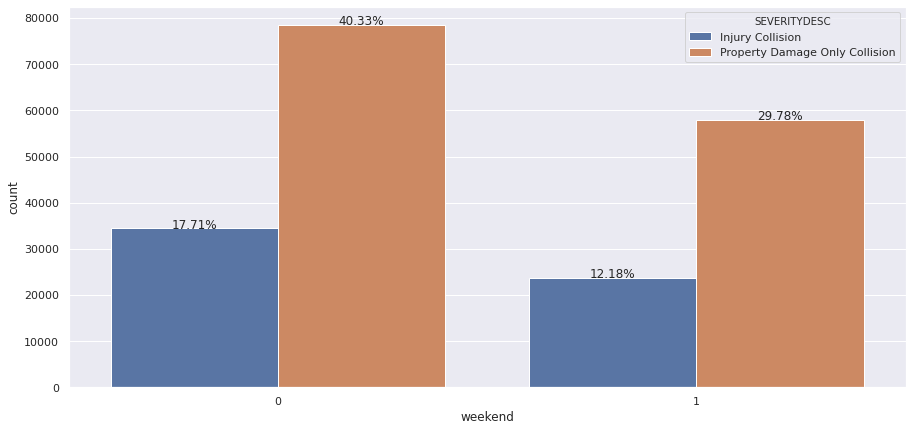

In [33]:
df_mod['weekend'] = df_mod['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

plt.figure(figsize=(15,7))
sns.set(style="darkgrid")
total = float(len(df_mod))
ax = sns.countplot(x="weekend", hue="SEVERITYDESC", data=df_mod) 
# Monday=0, Sunday=6
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

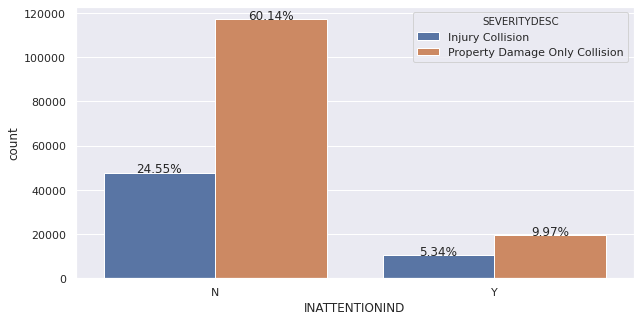

In [34]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
total = float(len(df_mod))
ax = sns.countplot(x="INATTENTIONIND", hue="SEVERITYDESC", data=df_mod)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

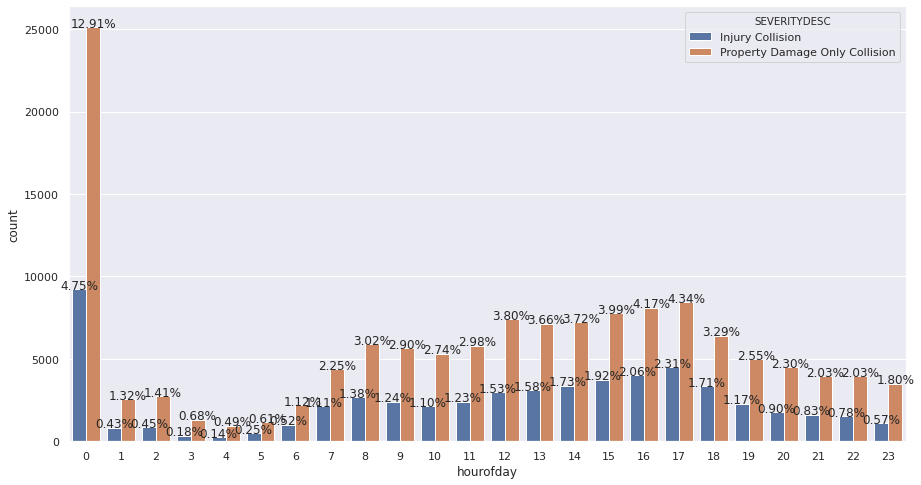

In [35]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
total = float(len(df_mod))
ax = sns.countplot(x="hourofday", hue="SEVERITYDESC", data=df_mod)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


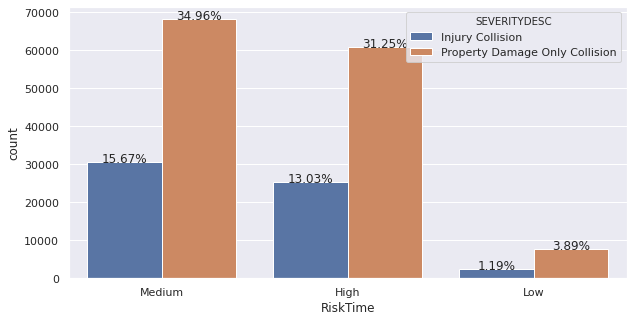

In [36]:
df_mod['RiskTime'] = df_mod['hourofday'].apply(lambda x: "Low" if x in (1,2,3,4) else ("Medium" if x in (5,6,7,8,9,10,11,12,13,14,15,16) else "High"))

from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
total = float(len(df_mod))
ax = sns.countplot(x="RiskTime", hue="SEVERITYDESC", data=df_mod)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

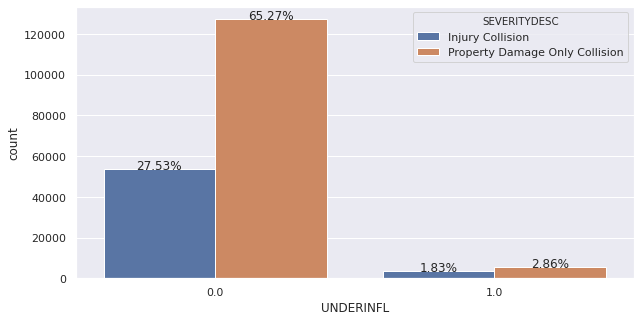

In [37]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
total = float(len(df_mod))
ax = sns.countplot(x="UNDERINFL", hue="SEVERITYDESC", data=df_mod)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

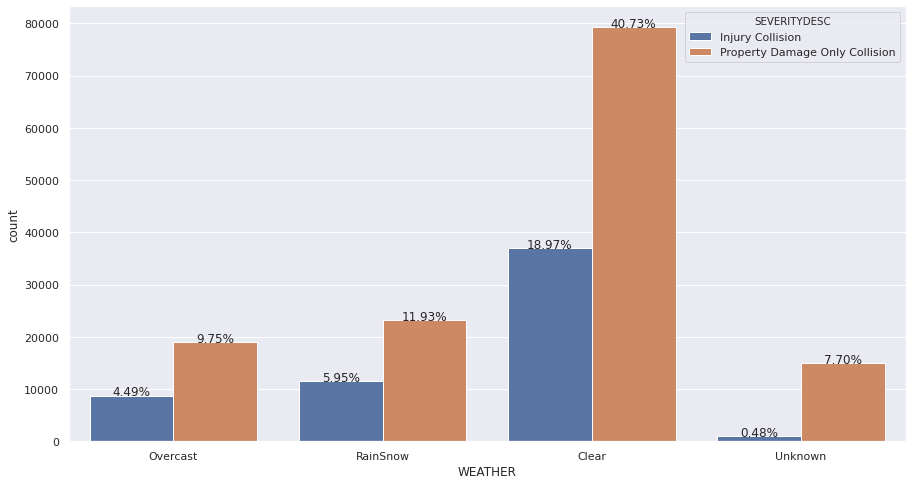

In [38]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
total = float(len(df_mod))
ax = sns.countplot(x="WEATHER", hue="SEVERITYDESC", data=df_mod)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

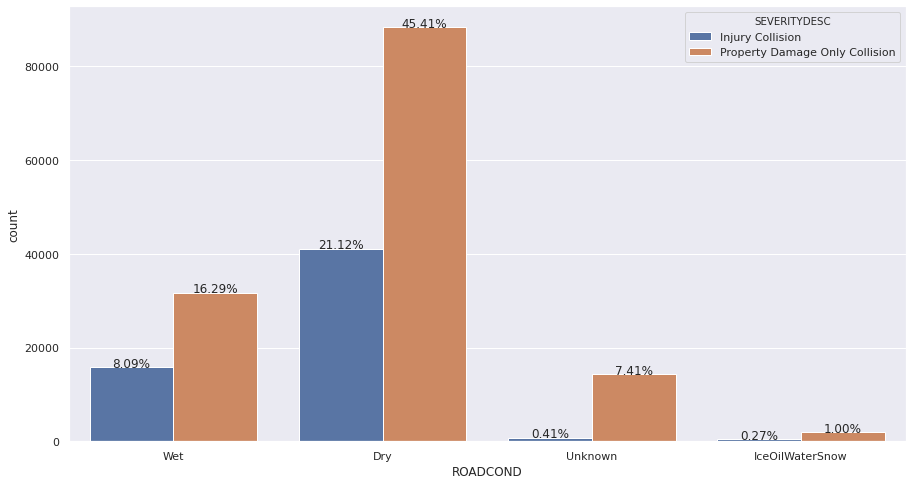

In [39]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
total = float(len(df_mod))
ax = sns.countplot(x="ROADCOND", hue="SEVERITYDESC", data=df_mod)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

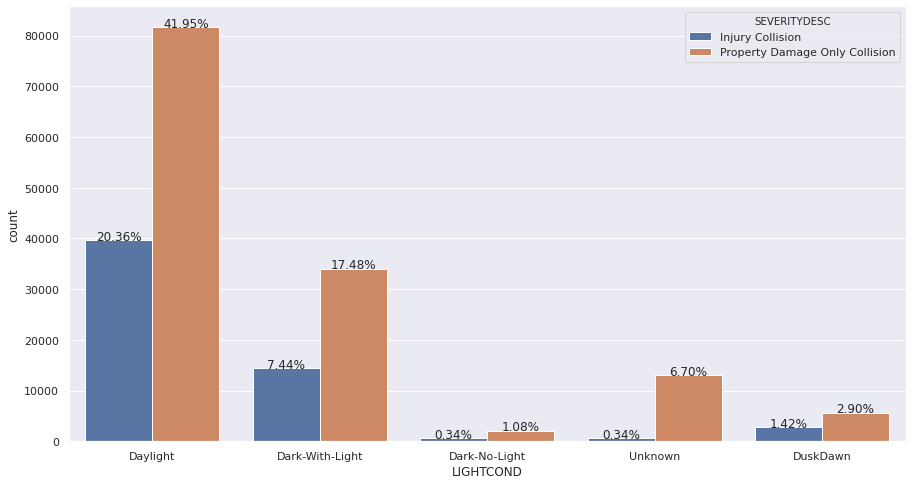

In [40]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
total = float(len(df_mod))
ax = sns.countplot(x="LIGHTCOND", hue="SEVERITYDESC", data=df_mod)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

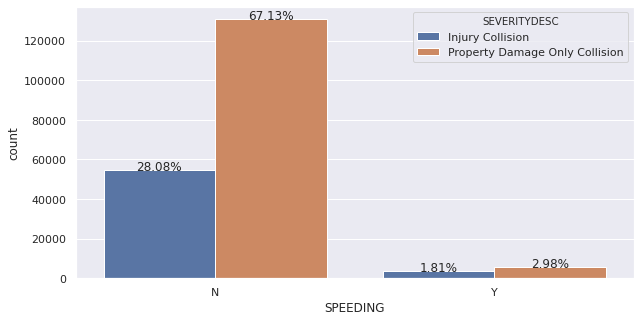

In [41]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
total = float(len(df_mod))
ax = sns.countplot(x="SPEEDING", hue="SEVERITYDESC", data=df_mod)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

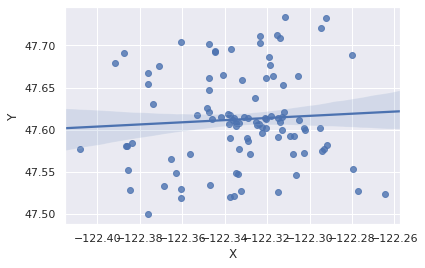

In [42]:
sns.regplot(x="X", y="Y",data=df_map.head(100), ci=80)
plt.show()

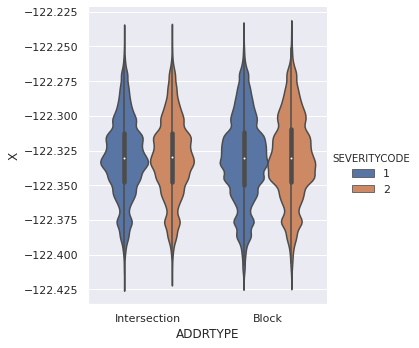

In [43]:
sns.catplot(x="ADDRTYPE", y="X", hue="SEVERITYCODE",data=df_map, kind="violin")
plt.show()

In [44]:
df_mod.describe(include=['object'])

,SEVERITYDESC,ADDRTYPE,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR,RiskTime
count,194673,194673,194673,194673,194673,194673,194673,194673,194673,194673
unique,2,3,4,2,4,4,5,2,2,3
top,Property Damage Only Collision,Block,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,N,N,Medium
freq,136485,128852,96138,164868,116216,129522,121307,185340,187457,98559


In [45]:
df_mod['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [46]:
df_mod['ADDRTYPE'].unique()

array(['Intersection', 'Block', 'Alley'], dtype=object)

In [47]:
df_gptest = df_mod[['hourofday','ADDRTYPE','SEVERITYCODE']]
grouped_test1 = df_gptest.groupby(['hourofday','ADDRTYPE'],as_index=False).mean()
grouped_test1

,hourofday,ADDRTYPE,SEVERITYCODE
0,0,Alley,1.124183
1,0,Block,1.216787
2,0,Intersection,1.391905
3,1,Alley,1.052632
4,1,Block,1.196220
...,...,...,...
67,22,Block,1.215426
68,22,Intersection,1.415429
69,23,Alley,1.107143
70,23,Block,1.181984


In [48]:
grouped_pivot = grouped_test1.pivot(index='ADDRTYPE',columns='hourofday')
grouped_pivot

SEVERITYCODE                                                    \
hourofday              0         1         2         3         4         5    
ADDRTYPE                                                                      
Alley            1.124183  1.052632  1.040000  1.142857  1.000000  1.333333   
Block            1.216787  1.196220  1.198075  1.172387  1.181435  1.230241   
Intersection     1.391905  1.379157  1.379545  1.341463  1.370370  1.441296   

                                                      ...                      \
hourofday           6         7         8         9   ...        14        15   
ADDRTYPE                                              ...                       
Alley         1.333333  1.166667  1.096774  1.071429  ...  1.071429  1.136364   
Block         1.236817  1.241329  1.260768  1.225813  ...  1.252028  1.260887   
Intersection  1.470270  1.477636  1.415385  1.434524  ...  1.437236  1.443081   

                                                                          \
hourofday           16        17        18        19        20        21   
ADDRTYPE                                                                   
Alley         1.176471  1.031250  1.107143  1.166667  1.107143  1.047619   
Block         1.270599  1.280489  1.267129  1.237556  1.208039  1.219358   
Intersection  1.436065  1.464979  1.476082  1.459725  1.424631  1.428797   

                                  
hourofday           22        23  
ADDRTYPE                          
Alley         1.086957  1.107143  
Block         1.215426  1.181984  
Intersection  1.415429  1.393468  

[3 rows x 24 columns]

In [49]:
df_mod.isnull().any()


SEVERITYCODE      False
SEVERITYDESC      False
ADDRTYPE          False
INCDATE           False
INCDTTM           False
JUNCTIONTYPE      False
INATTENTIONIND    False
UNDERINFL          True
WEATHER           False
ROADCOND          False
LIGHTCOND         False
SPEEDING          False
HITPARKEDCAR      False
hourofday         False
dayofweek         False
weekend           False
RiskTime          False
dtype: bool

In [50]:
y = df_mod["SEVERITYCODE"]

In [51]:
Feature = df_mod[['ADDRTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING', 'RiskTime','weekend']]
X = Feature.values
X[0:5]

array([['Intersection', 'At-Intersection', 'N', 0.0, 'Overcast', 'Wet',
        'Daylight', 'N', 'Medium', 0],
       ['Block', 'Mid-Block (not related to intersection)', 'N', 0.0,
        'RainSnow', 'Wet', 'Dark-With-Light', 'N', 'High', 0],
       ['Block', 'Mid-Block (not related to intersection)', 'N', 0.0,
        'Overcast', 'Dry', 'Daylight', 'N', 'Medium', 0],
       ['Block', 'Mid-Block (not related to intersection)', 'N', 0.0,
        'Clear', 'Dry', 'Daylight', 'N', 'Medium', 1],
       ['Intersection', 'At-Intersection', 'N', 0.0, 'RainSnow', 'Wet',
        'Daylight', 'N', 'Medium', 0]], dtype=object)

In [52]:
df_mod['weekend'].value_counts()

0    112996
1     81677
Name: weekend, dtype: int64

In [53]:
categorical_feature_mask = Feature.dtypes==object
categorical_feature_mask

ADDRTYPE           True
JUNCTIONTYPE       True
INATTENTIONIND     True
UNDERINFL         False
WEATHER            True
ROADCOND           True
LIGHTCOND          True
SPEEDING           True
RiskTime           True
weekend           False
dtype: bool

In [54]:
categorical_cols = Feature.columns[categorical_feature_mask].tolist()
categorical_cols

['ADDRTYPE',
 'JUNCTIONTYPE',
 'INATTENTIONIND',
 'WEATHER',
 'ROADCOND',
 'LIGHTCOND',
 'SPEEDING',
 'RiskTime']

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [56]:
Feature[categorical_cols] = Feature[categorical_cols].apply(lambda col: le.fit_transform(col))
Feature[categorical_cols].head(10)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,ADDRTYPE,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,RiskTime
0,2,0,0,1,3,2,0,2
1,1,2,0,2,3,1,0,0
2,1,2,0,1,0,2,0,2
3,1,2,0,0,0,2,0,2
4,2,0,0,2,3,2,0,2
5,2,0,0,0,0,2,0,0
6,2,0,0,2,3,2,0,0
7,2,0,0,0,0,2,0,0
8,1,2,0,0,0,2,0,2
9,2,0,0,0,0,2,0,2


In [57]:
X = Feature.values
X[0:5]

array([[2., 0., 0., 0., 1., 3., 2., 0., 2., 0.],
       [1., 2., 0., 0., 2., 3., 1., 0., 0., 0.],
       [1., 2., 0., 0., 1., 0., 2., 0., 2., 0.],
       [1., 2., 0., 0., 0., 0., 2., 0., 2., 1.],
       [2., 0., 0., 0., 2., 3., 2., 0., 2., 0.]])

In [58]:
print(Feature.shape)
dummy_Feature = pd.get_dummies(Feature)
print("----After Dummy Fuction------")
print(dummy_Feature.shape)
dummy_Feature

(194673, 10)
----After Dummy Fuction------
(194673, 10)


,ADDRTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,RiskTime,weekend
0,2,0,0,0.0,1,3,2,0,2,0
1,1,2,0,0.0,2,3,1,0,0,0
2,1,2,0,0.0,1,0,2,0,2,0
3,1,2,0,0.0,0,0,2,0,2,1
4,2,0,0,0.0,2,3,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...
194668,1,2,0,0.0,0,0,2,0,2,0
194669,1,2,1,0.0,2,3,2,0,2,0
194670,2,0,0,0.0,0,0,2,0,2,1
194671,2,0,0,0.0,0,0,3,0,2,0


In [59]:
X = dummy_Feature.values
X

array([[2., 0., 0., ..., 0., 2., 0.],
       [1., 2., 0., ..., 0., 0., 0.],
       [1., 2., 0., ..., 0., 2., 0.],
       ...,
       [2., 0., 0., ..., 0., 2., 1.],
       [2., 0., 0., ..., 0., 2., 0.],
       [1., 2., 0., ..., 0., 2., 1.]])

In [60]:
from sklearn.model_selection import train_test_split
X_train_raw, X_test, y_train_raw, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
print ('Train set:', X_train_raw.shape,  y_train_raw.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (116803, 10) (116803,)
Test set: (77870, 10) (77870,)


In [61]:
!pip install imblearn

In [87]:
df2=pd.DataFrame(y_train_raw)
df2.reset_index(inplace=True)
df2.drop(['index'],axis=1,inplace=True)
df0=pd.DataFrame(y_test)
df0.reset_index(inplace=True)
df0.drop(['index'],axis=1,inplace=True)
df2.head()

,SEVERITYCODE
0,1
1,1
2,2
3,1
4,1


In [88]:
df=pd.DataFrame(X_train_raw)
df1=pd.DataFrame(X_test)


In [89]:
df3=pd.concat([df,df2],axis=1)
df5=pd.concat([df1,df0],axis=1)
df3.head()

,0,1,2,3,4,5,6,7,8,9,SEVERITYCODE
0,1.0,2.0,0.0,0.0,1.0,3.0,2.0,0.0,2.0,1.0,1
1,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,1.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2
3,1.0,2.0,0.0,0.0,3.0,2.0,4.0,0.0,2.0,1.0,1
4,1.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,1


In [90]:
df3.dropna(inplace=True)
y_train_raw=np.array(df3['SEVERITYCODE'])
y_train_raw.shape
df4=df3.drop(['SEVERITYCODE'],axis=1)
X_train_raw=np.array(df4)
X_train_raw.shape
df5.dropna(inplace=True)
y_test=np.array(df5['SEVERITYCODE'])
y_test.shape
df6=df5.drop(['SEVERITYCODE'],axis=1)
X_test=np.array(df6)
X_test.shape

(75938, 10)

In [91]:
y_train_raw=df3['SEVERITYCODE']
y_test=df5['SEVERITYCODE']

In [67]:
y_train_raw.head()

0    1
1    1
2    2
3    1
4    1
Name: SEVERITYCODE, dtype: int64

In [92]:
y_test.head()

0    2
1    1
2    1
3    2
4    2
Name: SEVERITYCODE, dtype: int64

In [68]:
import imblearn
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=2)
X_train, y_train = os.fit_sample(X_train_raw, y_train_raw)
print ('Train set:', X_train.shape,  y_train.shape)

Train set: (159098, 10) (159098,)


In [69]:
print("----------Sample % before SMOTE--------------")
print(y_train_raw.value_counts()/len(y_train_raw))
print("----------Sample % After SMOTE --------------")
print(pd.Series(y_train).value_counts()/len(y_train))

----------Sample % before SMOTE--------------
1    0.698711
2    0.301289
Name: SEVERITYCODE, dtype: float64
----------Sample % After SMOTE --------------
2    0.5
1    0.5
Name: SEVERITYCODE, dtype: float64


In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
grid_params = {'n_neighbors': [i for i in range(1, 10)]}
grid = GridSearchCV(KNeighborsClassifier(),grid_params,cv = 5)
grid_results = grid.fit(X_train, y_train)

<AxesSubplot:>

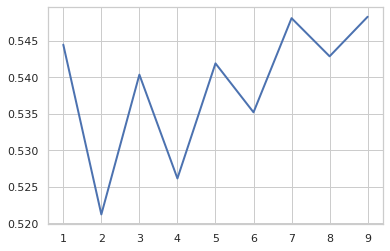

In [71]:
sns.set_style("whitegrid")
sns.lineplot(grid_params['n_neighbors'], grid_results.cv_results_['mean_test_score'], palette="hls", linewidth=2)

In [72]:
print("The best n_neighbors was  : ", grid_results.best_params_['n_neighbors'])
print("The best accuracy was with:", grid_results.best_score_.round(2))

The best n_neighbors was  :  9
The best accuracy was with: 0.55


In [73]:
neigh = KNeighborsClassifier(n_neighbors = 9).fit(X_train,y_train)
yhat_train = neigh.predict(X_train)

In [74]:
print("KNN Accuracy     : {:.2f}".format(metrics.accuracy_score(y_train, yhat_train)))
print("KNN Jaccard index: {:.2f}".format(metrics.jaccard_score(y_train, yhat_train)))
print("KNN F1-score     : {:.2f}".format(metrics.f1_score(y_train, yhat_train, average='weighted')))

KNN Accuracy     : 0.55
KNN Jaccard index: 0.46
KNN F1-score     : 0.53


[[61555 17994]
 [53158 26391]]
              precision    recall  f1-score   support

           1       0.54      0.77      0.63     79549
           2       0.59      0.33      0.43     79549

    accuracy                           0.55    159098
   macro avg       0.57      0.55      0.53    159098
weighted avg       0.57      0.55      0.53    159098



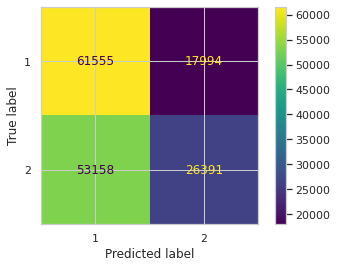

In [75]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_train, yhat_train))
print(classification_report(y_train, yhat_train))

plot_confusion_matrix(neigh, X_train, y_train, include_values=True)
plt.show()

[[40644 12437]
 [15730  7127]]
              precision    recall  f1-score   support

           1       0.72      0.77      0.74     53081
           2       0.36      0.31      0.34     22857

    accuracy                           0.63     75938
   macro avg       0.54      0.54      0.54     75938
weighted avg       0.61      0.63      0.62     75938



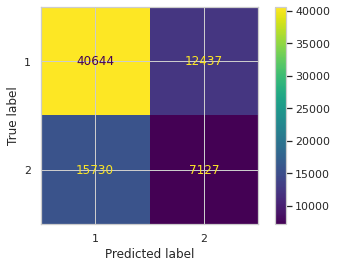

In [93]:
yhat_test = neigh.predict(X_test)

print(confusion_matrix(y_test, yhat_test))
print(classification_report(y_test, yhat_test))

plot_confusion_matrix(neigh, X_test, y_test, include_values=True)
plt.show()

The best tree_depth was:  23
The best accuracy was  :  0.6293982813372049


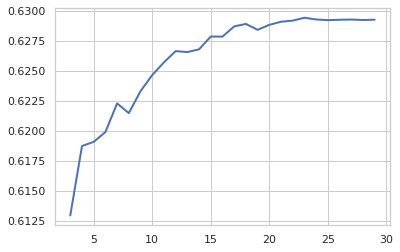

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.image as mpimg

tree_grid_params = {'criterion': ['entropy'], 'max_depth': [i for i in range(3,30)]}
tree_grid = GridSearchCV(tree.DecisionTreeClassifier(), tree_grid_params, cv = 3)
tree_grid_results = tree_grid.fit(X_train, y_train)

sns.set_style("whitegrid")
sns.lineplot(tree_grid_params['max_depth'], tree_grid_results.cv_results_['mean_test_score'], palette="hls", linewidth=2)
print("The best tree_depth was: ",tree_grid_results.best_params_["max_depth"])
print("The best accuracy was  : ",tree_grid_results.best_score_)

In [79]:
carTree = DecisionTreeClassifier(criterion="entropy", max_depth = tree_grid_results.best_params_.get('max_depth'))
carTree.fit(X_train,y_train)
y_predTree = carTree.predict(X_train)

In [80]:
print("loanTree Jaccard index: {:.2f}".format(metrics.jaccard_score(y_train, y_predTree)))
print("loanTree F1-score     : {:.2f}".format(metrics.f1_score(y_train, y_predTree, average='weighted')))

loanTree Jaccard index: 0.45
loanTree F1-score     : 0.64


[[46329 33220]
 [23332 56217]]
              precision    recall  f1-score   support

           1       0.67      0.58      0.62     79549
           2       0.63      0.71      0.67     79549

    accuracy                           0.64    159098
   macro avg       0.65      0.64      0.64    159098
weighted avg       0.65      0.64      0.64    159098



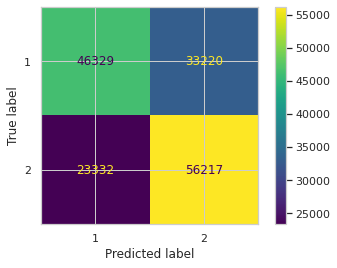

In [81]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_train, y_predTree))
print(classification_report(y_train, y_predTree))

plot_confusion_matrix(carTree, X_train, y_train, include_values=True)
plt.show()

[[30294 22787]
 [ 7736 15121]]
              precision    recall  f1-score   support

           1       0.80      0.57      0.66     53081
           2       0.40      0.66      0.50     22857

    accuracy                           0.60     75938
   macro avg       0.60      0.62      0.58     75938
weighted avg       0.68      0.60      0.61     75938



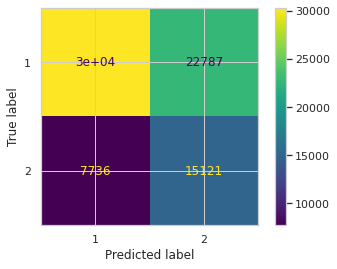

In [94]:
y_test_predTree = carTree.predict(X_test)
print(confusion_matrix(y_test, y_test_predTree))
print(classification_report(y_test, y_test_predTree))
plot_confusion_matrix(carTree, X_test, y_test, include_values=True)
plt.show()

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

grid_params = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
LR_grid = GridSearchCV(LogisticRegression(),grid_params,cv=3)
LR_grid.fit(X_train,y_train)

print("The best parameter was: ",LR_grid.best_params_)
print("The best accuracy was : ",LR_grid.best_score_)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklear

The best parameter was:  {'C': 1.0, 'penalty': 'l2'}
The best accuracy was :  0.6150800301785415


In [84]:
LR = LogisticRegression(C=0.01, solver='liblinear',penalty='l2').fit(X_train,y_train)
yhat_train_LR = LR.predict(X_train)
yhat_train_LR_prob = LR.predict_proba(X_train)

In [85]:
print("LR Jaccard index: {:.2f}".format(metrics.jaccard_score(y_train, yhat_train_LR)))
print("LR F1-score     : {:.2f}".format(metrics.f1_score(y_train, yhat_train_LR, average='weighted')))
print("LR Log Loss     : {:.2f}".format(metrics.log_loss(y_train, yhat_train_LR_prob)))

LR Jaccard index: 0.45
LR F1-score     : 0.61
LR Log Loss     : 0.65


[[50817 28732]
 [32504 47045]]
              precision    recall  f1-score   support

           1       0.61      0.64      0.62     79549
           2       0.62      0.59      0.61     79549

    accuracy                           0.62    159098
   macro avg       0.62      0.62      0.61    159098
weighted avg       0.62      0.62      0.61    159098



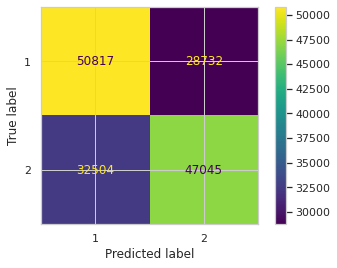

In [86]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_train, yhat_train_LR))
print(classification_report(y_train, yhat_train_LR))

plot_confusion_matrix(LR, X_train, y_train, include_values=True)
plt.show()

[[33582 19499]
 [ 9362 13495]]
              precision    recall  f1-score   support

           1       0.78      0.63      0.70     53081
           2       0.41      0.59      0.48     22857

    accuracy                           0.62     75938
   macro avg       0.60      0.61      0.59     75938
weighted avg       0.67      0.62      0.63     75938



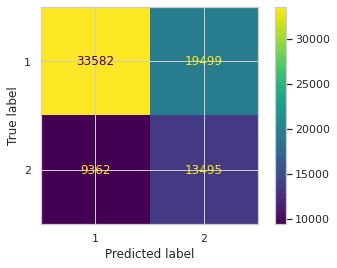

In [95]:
yhat_test_LR = LR.predict(X_test)

print(confusion_matrix(y_test, yhat_test_LR))
print(classification_report(y_test, yhat_test_LR))

plot_confusion_matrix(LR, X_test, y_test, include_values=True)
plt.show()